# Mobile Price Prediction


### About the Algorithm used in
The major aim of in this project is to predict the mobile prices based on the features using some of the regression technique and algorithm.

    1. Random Forest Regressor

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10,6))
import warnings
import random
warnings.filterwarnings('ignore')

# parameter search
from sklearn.model_selection import GridSearchCV

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesClassifier

### About the Features

**Product_id** : ID of each cellphone <br>
**Price** : Price of each cellphone<br>
**Sale** : Sales number<br>
**weight** : Weight of each cellphone<br>
**resoloution** : Resoloution of each cellphone<br>
**ppi** : Phone Pixel Density<br>
**cpu core** : type of CPU core in each cellphone<br>
**cpu freq** : CPU Frequency in each cellphone<br>
**internal mem** : Internal memory of each cellphone<br>
**ram** : RAM of each cellphone<br>

In [2]:
data = pd.read_csv("Cellphone.csv")
data.rename(columns = {'Product_id':'product_id',
                       'Price':'price',
                       'Sale':'sale',
                       'resoloution':'resolution',
                       'cpu core':'cpu_core',
                       'cpu freq':'cpu_freq',
                       'internal mem':'internal_mem',
                       'RearCam':'rear_cam',
                       'Front_Cam':'front_cam',}, inplace = True)
data.head()

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
data.shape

(161, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    161 non-null    int64  
 1   price         161 non-null    int64  
 2   sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resolution    161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  rear_cam      161 non-null    float64
 11  front_cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [5]:
data.describe()

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [6]:
data.isnull().sum() # no missing values

product_id      0
price           0
sale            0
weight          0
resolution      0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rear_cam        0
front_cam       0
battery         0
thickness       0
dtype: int64

In [7]:
data.dtypes

product_id        int64
price             int64
sale              int64
weight          float64
resolution      float64
ppi               int64
cpu_core          int64
cpu_freq        float64
internal_mem    float64
ram             float64
rear_cam        float64
front_cam       float64
battery           int64
thickness       float64
dtype: object

In [8]:
data.sort_values(by = "price", ascending=False).head(10) 

,product_id,price,sale,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
153,290,4361,3291,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
152,290,4361,3248,238.0,5.70,515,8,1.950,128.0,6.0,12.0,8.0,7000,7.4
83,1216,3837,111,167.8,5.43,541,4,1.875,128.0,6.0,16.0,8.0,3600,7.6
87,1216,3837,119,167.8,5.43,541,4,1.875,128.0,6.0,16.0,8.0,3600,7.6
53,1248,3658,45,168.0,5.15,428,8,2.450,64.0,6.0,12.0,8.0,3350,7.5
56,1248,3658,52,168.0,5.15,428,8,2.450,64.0,6.0,12.0,8.0,3350,7.5
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
155,1206,3551,4408,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
32,1145,3316,26,144.0,5.20,428,8,1.750,32.0,3.0,20.7,5.1,2930,6.9
47,1145,3316,41,144.0,5.20,428,8,1.750,32.0,3.0,20.7,5.1,2930,6.9


It is seen that the resolutions, CPU frequency, core and RAM of the phones with high prices are high. Although the front camera and rear camera are not high in the most expensive phone compared to other phones, it is understood that the most expensive phone in terms of charging is higher than the others.

## Data Analysis and Visualisation

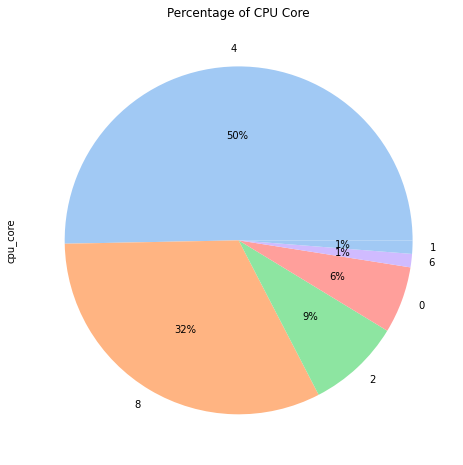

In [9]:
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(12,8))
pie = data.cpu_core.value_counts().plot(kind='pie',colors = colors, autopct='%.0f%%')
pie.set_title("Percentage of CPU Core")
plt.show()

50% of phones have **4-core CPU**s while 30% have **8-core CPU**s.

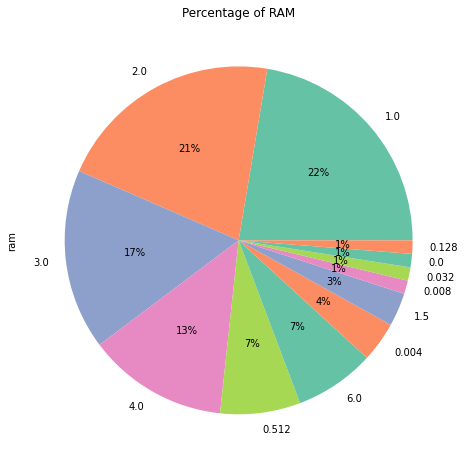

In [10]:
colors = sns.color_palette('Set2')[0:5]

plt.figure(figsize=(12,8))
pie = data.ram.value_counts().plot(kind='pie',colors = colors, autopct='%.0f%%')
pie.set_title("Percentage of RAM")
plt.show()

The majority of them are phones with 1 GB RAM with 22%, followed by phones with 2 GB RAM with a small margin. The amount of RAM that should be in smartphones today is 6 GB on average, while this rate is only 7%. Before the effect of RAM on phone prices, we can understand from the fact that the first eight of the 10 most expensive phones examined have 6 GB of RAM.

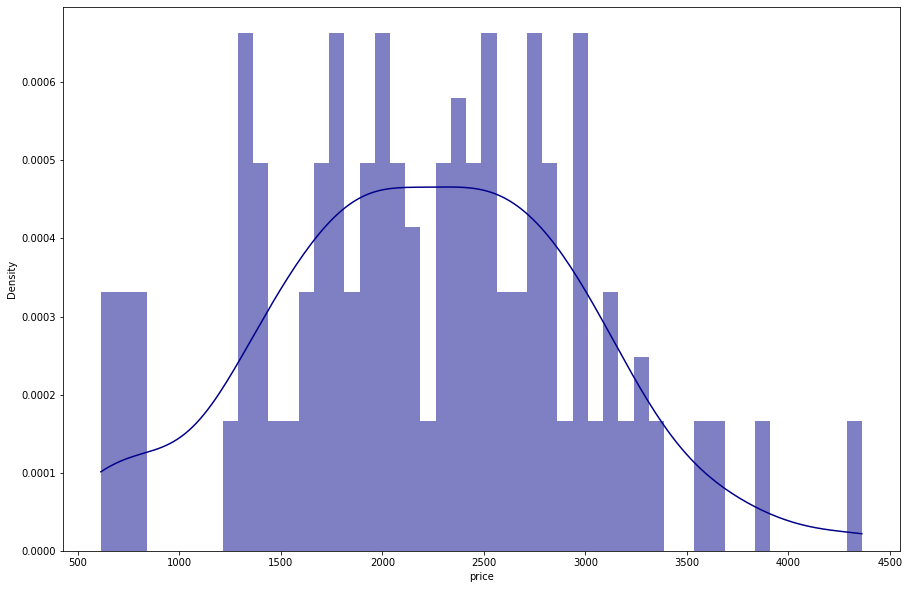

In [11]:
plt.figure(figsize=(15,10))
sns.histplot(x='price',data=data,kde=True, stat='density', linewidth=0, bins=50,color="darkblue");

Phone prices show the highest density between 2000-2500.

In [12]:
data.corr()["price"].sort_values()

thickness      -0.716773
weight          0.144555
product_id      0.165136
sale            0.273263
resolution      0.404010
battery         0.559946
front_cam       0.675286
cpu_core        0.686811
cpu_freq        0.727383
rear_cam        0.739538
internal_mem    0.776738
ppi             0.817614
ram             0.896915
price           1.000000
Name: price, dtype: float64

### Understanding the correlation of features between target and other features

A **correlation analysis** can show important connections between several measures or sets of metrics. Even though the measurements originate from many business departments, information about those links might offer new perspectives and highlight interdependencies.

Price seems to be **highly correlated** with *RAM, PPI, Memory* and *Rear Camera* resolution. Additionally *Thickness* and *Price* seems to be **negatively correlated** which indicates that there is a relationship between these such that as the value of one variable increases, the other decreases.

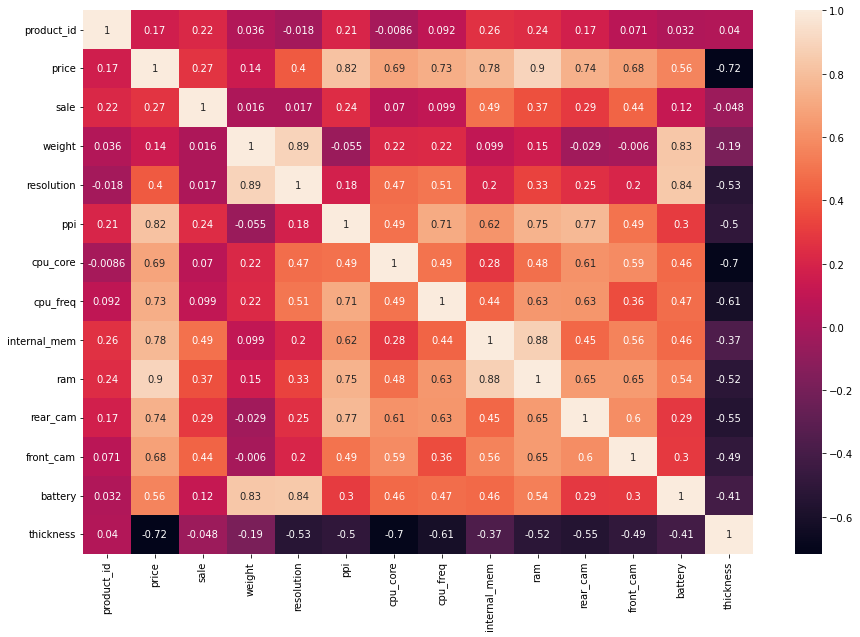

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True);

In [14]:
data.groupby("rear_cam")["price"].agg(['min','max']).sort_values(['max'])

,min,max
rear_cam,,
1.30,628,628
0.00,614,833
3.00,1396,1396
2.00,705,1421
10.00,1676,1676
3.15,1315,1810
5.00,1357,2124
4.00,2409,2409
21.50,2536,2536


In [15]:
data['ppi'].unique()

array([424, 233, 312, 401, 432, 277, 200, 294, 524, 441, 534, 282, 577,
       469, 220, 187, 428, 386, 224, 178, 218, 515, 245, 170, 306, 283,
       121, 541, 160, 235, 189, 221, 367, 166, 440, 513, 167, 403, 258,
       128, 247, 184, 806, 129, 538], dtype=int64)

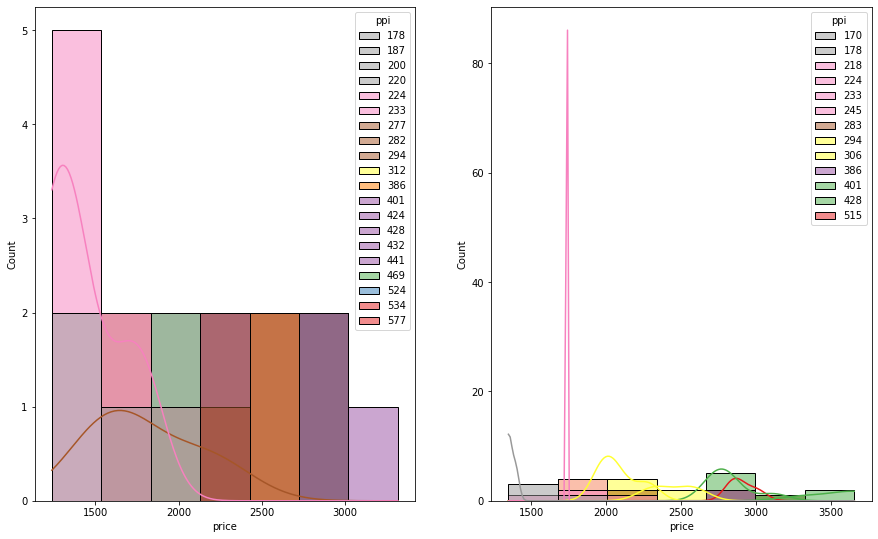

In [16]:
plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
sns.histplot(data=data[:40], x='price',hue='ppi',kde=True, palette='Set1_r');

plt.subplot(2,2,2)
sns.histplot(data=data[40:80], x='price',hue='ppi',kde=True, palette='Set1_r');

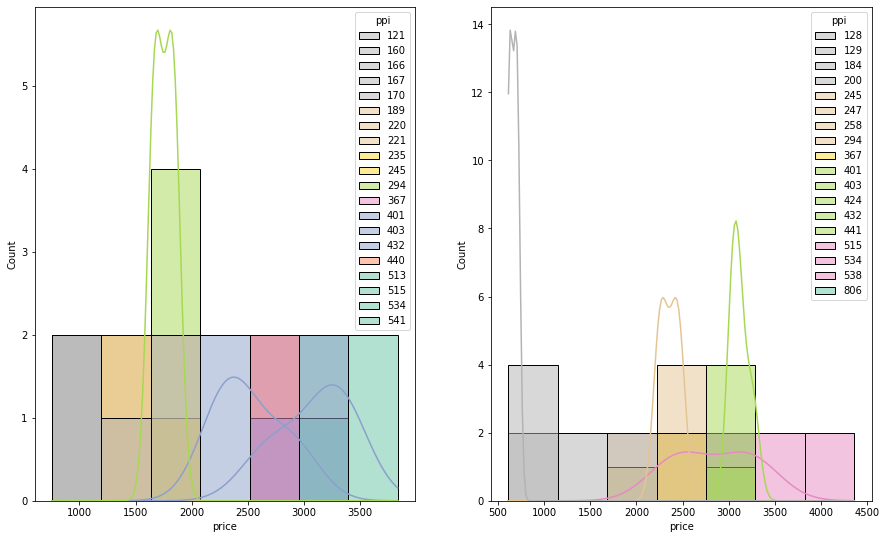

In [17]:
plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
sns.histplot(data=data[80:120], x='price',hue='ppi',kde=True, palette='Set2_r');

plt.subplot(2,2,2)
sns.histplot(data=data[120:], x='price',hue='ppi',kde=True, palette='Set2_r');

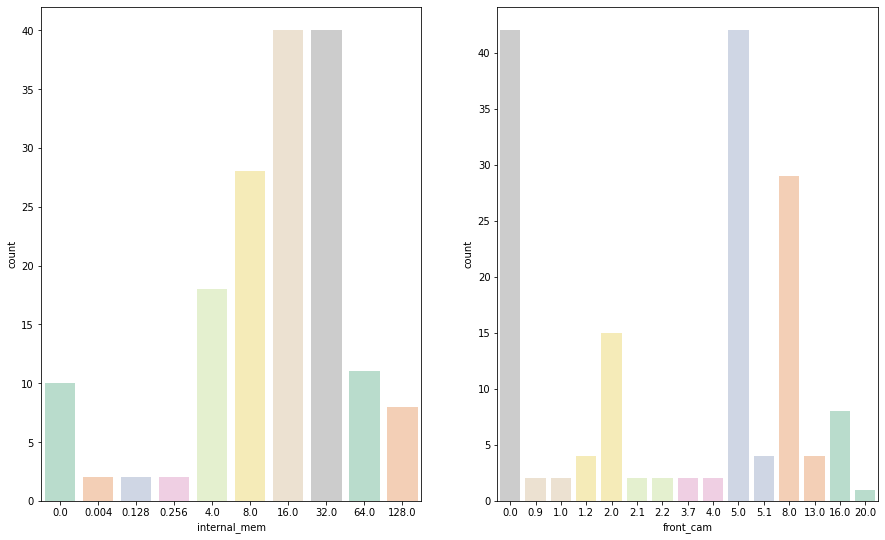

In [18]:
plt.figure(figsize=(15, 20))

plt.subplot(2,2,1)
sns.countplot(x="internal_mem",data=data,palette='Pastel2');

plt.subplot(2,2,2)
sns.countplot(x="front_cam",data=data,palette='Pastel2_r');

The majority of the phone's internal memory is *16* and *32 GB*.

## Feature Selection

When creating a predictive model, the process of feature selection involves lowering the number of input variables. In some circumstances, reducing the number of input variables might enhance the efficiency of the model while also lowering the computing cost of modeling. Irrelevant features in the data can cause the model learn based on irrelevant features, which can reduce model accuracy.

Feature selection works by selecting the best features based on univariate statistical tests.

    For regression: f_regression, mutual_info_regression

    For classification: chi2, f_classif, mutual_info_classif

In [19]:
X = data.drop('price', axis=1)
y = data['price']

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [20]:
print(X.shape)
print(y.shape)
print(data.shape)

(161, 13)
(161,)
(161, 14)


In [21]:
best_features = SelectKBest(score_func=chi2, k=4) # ks is the number of top features to select.

fit = best_features.fit(X,y)

In [22]:
data_scores = pd.DataFrame(fit.scores_)

data_columns = pd.DataFrame(X.columns)

features_score = pd.concat([data_columns,data_scores], axis=1)
features_score.columns = ['Features','Score']

features_score

,Features,Score
0,product_id,38610.357422
1,sale,583404.169378
2,weight,8093.849452
3,resolution,69.901659
4,ppi,8659.631099
5,cpu_core,193.470588
6,cpu_freq,36.900848
7,internal_mem,5407.719144
8,ram,187.488514
9,rear_cam,588.241035


In [23]:
# Returns the first `4` rows ordered by `Score` in descending order.
print(features_score.nlargest(4,'Score'))

      Features          Score
1         sale  583404.169378
11     battery  105162.693409
0   product_id   38610.357422
4          ppi    8659.631099


## Feature Importance

In [24]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

[0.08560856 0.06673529 0.09052396 0.07843318 0.08747279 0.05124361
 0.07955159 0.06620278 0.06805983 0.07798331 0.05541021 0.10051869
 0.09225621]


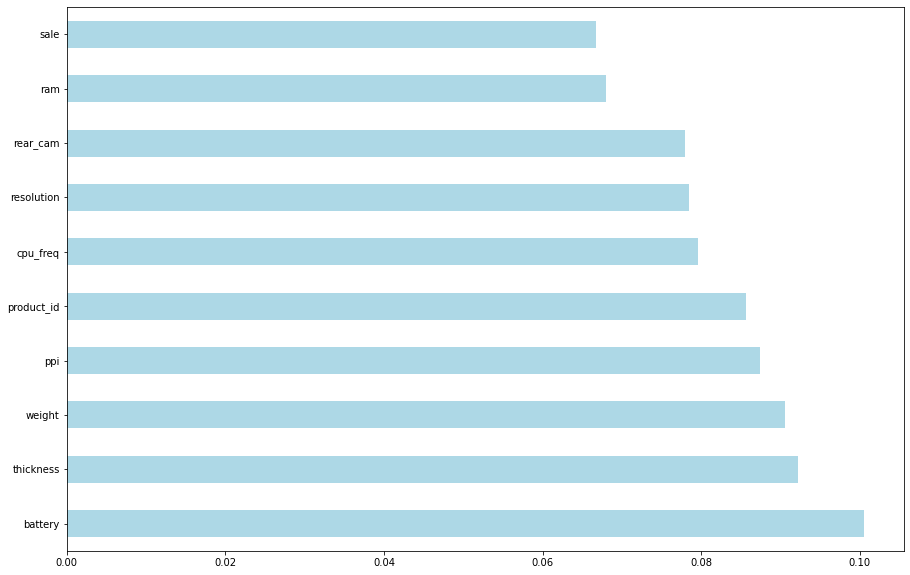

In [25]:
print(model.feature_importances_)

feature_importances = pd.Series(model.feature_importances_, index = X.columns)

plt.figure(figsize=(15,10))
feature_importances.nlargest(10).plot(kind='barh', color="lightblue")
plt.show()

I did not choose to exclude any attributes from the model as there was no high significance difference between them.

## Training  the Model / Model Fitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

### Random Forest Regressor

A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The bootstrapping Random Forest algorithm combines ensemble learning methods with the decision tree framework to create multiple randomly drawn decision trees from the data, averaging the results to output a new result that often leads to strong predictions/classifications.

In [27]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
y_pred = regressor.predict(X_test)

print("Training Accuracy: ", regressor.score(X_train,y_train))
print("Testing Accuracy: ", regressor.score(X_test,y_test))

mse= mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

rmse = mse**.5
print("RMSE: ",rmse)

Training Accuracy:  0.9903697458901819
Testing Accuracy:  0.9572745974773316
MSE:  22320.95208181818
RMSE:  149.40198151904875


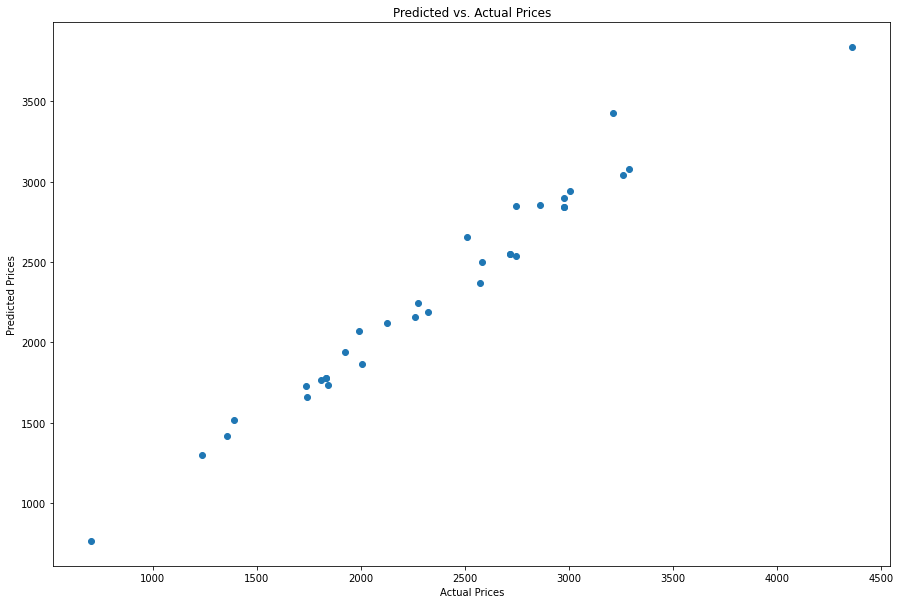

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()

## Parameter Search

In [30]:
# defining parameters of 

parameters = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

gridsearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv= 5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [31]:
print("Best score %0.3f" % gridsearch.best_score_)
print("Best parameters set: ")
best_parameters = gridsearch.best_estimator_.get_params()

for params in sorted(parameters.keys()):
    print("\t%s: %r" % (params, best_parameters[params]))

Best score 0.947
Best parameters set: 
	max_depth: 7
	max_features: 'sqrt'
	n_estimators: 300
	random_state: 18


Training Accuracy:  0.9903697458901819
Testing Accuracy:  0.9572745974773316
MSE:  21101
RMSE:  145


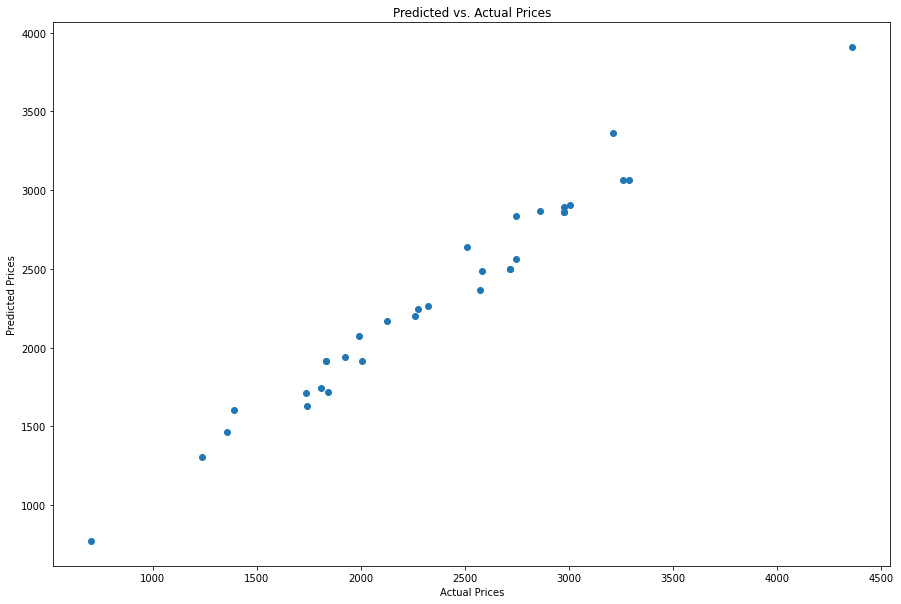

In [34]:
regressor2 = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
regressor2.fit(X_train,y_train)

y_predict = regressor2.predict(X_test)

print("Training Accuracy: ", regressor.score(X_train,y_train))
print("Testing Accuracy: ", regressor.score(X_test,y_test))

mse= mean_squared_error(y_test, y_predict)
print("MSE: ",round(mse))

rmse = np.sqrt(mse)
print("RMSE: ",round(rmse))

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()